
# Solução do Problema

Seguem abaixo as respostas das questões levantadas no Objetivo do MVP.


## Quais são os 10 filmes que possuem o maior número de avaliações dos usuários?

In [0]:
%sql
--Quais são os 10 filmes que possuem o maior número de avaliações dos usuários?
SELECT 
    id_obra AS `Identificador da Obra`,
    tx_nome_obra AS `Nome do Filme`,
    REGEXP_REPLACE(FORMAT_NUMBER(nu_votos, 0), ',', '.') AS `Número de Votos`,
    'https://www.imdb.com/pt/title/' || id_obra as `Link para o Filme`
FROM 
    curado.fato_filmes ff1
WHERE 
    (
        SELECT 
            count(*) 
        FROM 
            curado.fato_filmes ff2 
        WHERE 
            ff2.nu_votos > ff1.nu_votos 
            AND ff2.nu_votos IS NOT null
    ) < 10
    AND ff1.nu_votos IS NOT null
ORDER BY nu_votos DESC;

Identificador da Obra,Nome do Filme,Número de Votos,Link para o Filme
tt0111161,The Shawshank Redemption,3.023.533,https://www.imdb.com/pt/title/tt0111161
tt0468569,The Dark Knight,2.999.731,https://www.imdb.com/pt/title/tt0468569
tt1375666,Inception,2.665.928,https://www.imdb.com/pt/title/tt1375666
tt0137523,Fight Club,2.445.325,https://www.imdb.com/pt/title/tt0137523
tt0109830,Forrest Gump,2.363.481,https://www.imdb.com/pt/title/tt0109830
tt0110912,Pulp Fiction,2.320.063,https://www.imdb.com/pt/title/tt0110912
tt0816692,Interstellar,2.317.550,https://www.imdb.com/pt/title/tt0816692
tt0133093,The Matrix,2.142.073,https://www.imdb.com/pt/title/tt0133093
tt0068646,The Godfather,2.110.101,https://www.imdb.com/pt/title/tt0068646
tt0120737,The Lord of the Rings: The Fellowship of the Ring,2.094.804,https://www.imdb.com/pt/title/tt0120737


**Comentário:** foram selecionados os 10 filmes que possuem mais votos no IMDB, sendo que foram retirados aqueles sem a informação do número de votos (nulo). Esse ranking é um indicativo da popularidade do filme, uma vez que as avaliações são feitas pelos próprios usuários do IMDB. Não foi utilizado o artifício de limitar o número de linhas do retorno  da _query_ (LIMIT 10), mas sim foi feito o teste usando a própria sintaxe do SQL por uma _subquery_.

## Qual é o ranking dos 20 filmes mais bem avaliados?

In [0]:
%sql
--Qual é o ranking dos 20 filmes mais bem avaliados?
SELECT 
    id_obra AS `Identificador da Obra`,
    tx_nome_obra AS `Nome do Filme`,
    REGEXP_REPLACE(FORMAT_NUMBER(vl_avaliacao_media, 1), ',', '.') AS `Avaliação`,
    REGEXP_REPLACE(FORMAT_NUMBER(nu_votos, 0), ',', '.') AS `Número de Votos`,
    'https://www.imdb.com/pt/title/' || id_obra AS `Link para o Filme`
FROM 
    curado.fato_filmes ff1
where 
    (
            SELECT 
                COUNT(*)
            FROM 
                curado.fato_filmes ff2
            WHERE 
                ff2.vl_avaliacao_media > ff1.vl_avaliacao_media 
                AND ff2.nu_votos > 50000 
                AND ff2.vl_avaliacao_media IS NOT null
    ) < 20
    AND ff1.vl_avaliacao_media IS NOT null
    AND ff1.nu_votos > 50000
ORDER BY 
    vl_avaliacao_media DESC;

Identificador da Obra,Nome do Filme,Avaliação,Número de Votos,Link para o Filme
tt0111161,The Shawshank Redemption,9.3,3.023.533,https://www.imdb.com/pt/title/tt0111161
tt0068646,The Godfather,9.2,2.110.101,https://www.imdb.com/pt/title/tt0068646
tt0108052,Schindler's List,9.0,1.513.409,https://www.imdb.com/pt/title/tt0108052
tt0050083,12 Angry Men,9.0,917.999,https://www.imdb.com/pt/title/tt0050083
tt0071562,The Godfather Part II,9.0,1.420.917,https://www.imdb.com/pt/title/tt0071562
tt0468569,The Dark Knight,9.0,2.999.731,https://www.imdb.com/pt/title/tt0468569
tt0167260,The Lord of the Rings: The Return of the King,9.0,2.065.378,https://www.imdb.com/pt/title/tt0167260
tt0110912,Pulp Fiction,8.9,2.320.063,https://www.imdb.com/pt/title/tt0110912
tt0120737,The Lord of the Rings: The Fellowship of the Ring,8.9,2.094.804,https://www.imdb.com/pt/title/tt0120737
tt0109830,Forrest Gump,8.8,2.363.481,https://www.imdb.com/pt/title/tt0109830


**Comentário:** inicialmente a resposta foi realizada sem o filtro de número do votos (nu_votos > 50000), mas verificou-se uma grande quantidade de títulos bem avaliados, mas com um pequeno número de votos. Dessa forma, para garantir que fossem selecionados filmes mais conhecidos, foi feito arbitrariamente o filtro pelo número de votos. Os pontos negativos dessa estratégia são: penalizar os filmes mais antigos que naturalmente possuem menos votos que os filmes mais recentes e; penalizar filmes realmente bons, mas que estão fora do _mainstream_.

## Quais atores e atrizes mais aparecem nos filmes do ranking dos 100 filmes mais bem avaliados?

In [0]:
%sql
--Quais atores e atrizes mais aparecem nos filmes do ranking dos 100 filmes mais bem avaliados?
SELECT 
  art.id_pessoa AS `Identificador do Artista`,
  art.tx_nome AS `Nome do Artista`,
  COUNT(*) AS `Quantidade de Aparições`,
  'https://www.imdb.com/pt/name/' || art.id_pessoa AS `Link para o Artista`
FROM
  curado.dim_artistas art
    INNER JOIN curado.dim_personagens_filmes pers
      ON art.id_pessoa = pers.id_pessoa
WHERE
  pers.id_obra IN
    (
      SELECT 
          id_obra
      FROM 
          curado.fato_filmes ff1
      WHERE 
        (
          SELECT 
            COUNT(*) 
          FROM
            curado.fato_filmes ff2 
          WHERE 
            ff2.vl_avaliacao_media > ff1.vl_avaliacao_media 
            AND ff2.nu_votos > 50000
        ) < 100
        AND ff1.vl_avaliacao_media is not null
        AND ff1.nu_votos > 50000
    )
GROUP BY 
  art.id_pessoa, 
  art.tx_nome, 
  'https://www.imdb.com/pt/name/' || art.id_pessoa 
ORDER BY 
  3 DESC;

Identificador do Artista,Nome do Artista,Quantidade de Aparições,Link para o Artista
nm0000375,Robert Downey Jr.,5,https://www.imdb.com/pt/name/nm0000375
nm0000134,Robert De Niro,5,https://www.imdb.com/pt/name/nm0000134
nm0000158,Tom Hanks,5,https://www.imdb.com/pt/name/nm0000158
nm0000148,Harrison Ford,5,https://www.imdb.com/pt/name/nm0000148
nm0424060,Scarlett Johansson,5,https://www.imdb.com/pt/name/nm0424060
nm0749263,Mark Ruffalo,5,https://www.imdb.com/pt/name/nm0749263
nm0000151,Morgan Freeman,4,https://www.imdb.com/pt/name/nm0000151
nm0000122,Charles Chaplin,4,https://www.imdb.com/pt/name/nm0000122
nm0000332,Don Cheadle,4,https://www.imdb.com/pt/name/nm0000332
nm0687189,Suzanne Pleshette,4,https://www.imdb.com/pt/name/nm0687189


**Comentário:** o objetivo dessa análise é relacionar os artistas (atores e atrizes) com os filmes que são bem avaliados pelo público, formando uma lista ordenada de forma decrescente pelo númeor de participações nesses filmes.

#Qual é a distribuição de notas médias dos filmes ao longo das décadas?

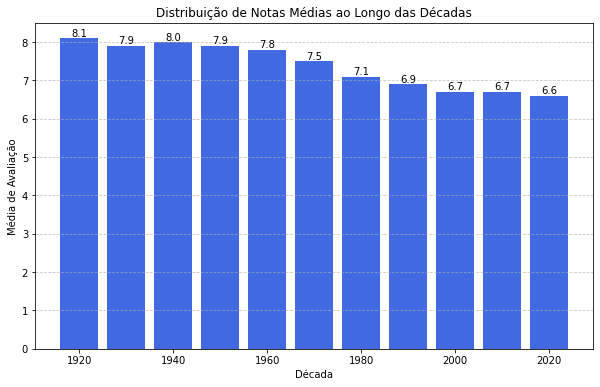

Década,Avaliação,Número de Votos
1920,8.1,993.447
1930,7.9,2.695.855
1940,8.0,4.464.677
1950,7.9,8.916.245
1960,7.8,12.141.664
1970,7.5,24.147.039
1980,7.1,52.824.243
1990,6.9,130.426.620
2000,6.7,263.679.646
2010,6.7,313.672.325


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

#Qual é a distribuição de notas médias dos filmes ao longo das décadas?
query = """
SELECT 
    CAST(ff1.nu_ano_inicial / 10 AS INT) * 10 AS `Década`,
    ROUND(AVG(ff1.vl_avaliacao_media),1) AS `Avaliação`,
    regexp_replace(format_number(SUM(nu_votos), 0), ',', '.') as `Número de Votos`
FROM 
    curado.fato_filmes ff1
WHERE 
    ff1.vl_avaliacao_media IS NOT NULL
    AND ff1.nu_votos > 50000
GROUP BY 
    CAST(ff1.nu_ano_inicial / 10 AS INT) * 10
ORDER BY 1 ASC
"""

# Executando a query no Databricks
_sqldf = spark.sql(query)

# Convertendo para Pandas
df_pandas = _sqldf.toPandas()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df_pandas['Década'], df_pandas['Avaliação'], color='royalblue', width=8)

# Adicionando os labels nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Personalização do gráfico
plt.xlabel('Década')
plt.ylabel('Média de Avaliação')
plt.title('Distribuição de Notas Médias ao Longo das Décadas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()

# Exibir dados
display(df_pandas)


**Comentário:** o objetivo dessa pergunta é analisar qual o sentimento do público ao longo das décadas quanto à qualidade dos filmes. Como o número de votos vai crescendo ao longo das décadas, pode haver um efeito nas notas, pois o IMDB é mais recente que muitos filmes das décadas mais antigas. Dessa forma, pode haver uma falsa percepção que os filmes antigos são melhores que os novos. Outro ponto interessante a observar é que atualmente como há uma grande quantidade de filmes lançados, pode ser difícil escolher aqueles que realmente tem boas histórias a serem contadas.

##Quais diretores possuem a maior média de avaliação em seus filmes?

In [0]:
%sql
--Quais diretores que possuem a maior média de avaliação em seus filmes?
SELECT 
  `Nome do(a) Direto(a)`,
   FORMAT_NUMBER(`Avaliação`,1) AS `Avaliação`,
  `Quantidade de Filmes`,
  'https://www.imdb.com/pt/name/' || id_pessoa AS `Link para o(a) Diretor(a)`
FROM
  (
    SELECT 
        dir.tx_nome AS `Nome do(a) Direto(a)`,
        dir.id_pessoa,
        AVG(ff1.vl_avaliacao_media) AS `Avaliação`,
        COUNT(*) AS `Quantidade de Filmes`
    FROM 
        curado.fato_filmes ff1
          INNER JOIN curado.diretores_filmes dirf
            ON ff1.id_obra = dirf.id_obra
              INNER JOIN curado.dim_diretores dir
                ON dirf.id_pessoa = dir.id_pessoa
    WHERE 
        ff1.vl_avaliacao_media IS NOT NULL
        AND ff1.nu_votos > 50000
    GROUP BY 
        dir.id_pessoa,
        dir.tx_nome
  )
WHERE
  `Quantidade de Filmes` >= 5
ORDER BY 2 DESC,3 DESC

Nome do(a) Direto(a),Avaliação,Quantidade de Filmes,Link para o(a) Diretor(a)
Akira Kurosawa,8.3,7,https://www.imdb.com/pt/name/nm0000041
Charles Chaplin,8.3,5,https://www.imdb.com/pt/name/nm0000122
Sergio Leone,8.3,5,https://www.imdb.com/pt/name/nm0001466
Christopher Nolan,8.2,12,https://www.imdb.com/pt/name/nm0634240
Billy Wilder,8.2,7,https://www.imdb.com/pt/name/nm0000697
Stanley Kubrick,8.1,11,https://www.imdb.com/pt/name/nm0000040
Hayao Miyazaki,8.0,11,https://www.imdb.com/pt/name/nm0594503
Quentin Tarantino,7.9,13,https://www.imdb.com/pt/name/nm0000233
Denis Villeneuve,7.9,8,https://www.imdb.com/pt/name/nm0898288
James Cameron,7.9,8,https://www.imdb.com/pt/name/nm0000116


**Comentário:** o objetivo dessa pergunta é verificar quais diretores tem a maior média de avaliação das suas obras mais populares. O critério de desempate quando a nota é igual é quantidade de filmes. Foram selecionados diretores que possuem ao menos 5 filmes com popularidade relevante.

#Quais filmes após 2010 foram encenados apenas por atrizes?

In [0]:
%sql
--Quais filmes após 2010 foram encenados apenas por atrizes?
SELECT 
  id_obra AS `Identificador da Obra`,
  tx_nome_obra AS `Nome do Filme`,
  (
      SELECT 
        COUNT(DISTINCT id_pessoa) 
      FROM
        curado.dim_personagens_filmes pers 
      WHERE 
        pers.tx_categoria='actress' 
        AND pers.id_obra = ff.id_obra
  ) AS `Quantidade de Atrizes`,
  'https://www.imdb.com/pt/title/' || id_obra AS `Link para o Filme`
FROM
  curado.fato_filmes ff
WHERE
  ff.nu_votos > 50000
  AND ff.nu_ano_inicial >= 2010
  AND 
    (
      SELECT 
        COUNT(DISTINCT id_pessoa) 
      FROM 
        curado.dim_personagens_filmes pers 
      WHERE 
        pers.tx_categoria='actor' 
        AND pers.id_obra = ff.id_obra
    ) = 0 --verificando se não tem homens
  AND 
    (
        SELECT 
          COUNT(DISTINCT id_pessoa)
        FROM 
          curado.dim_personagens_filmes pers 
        WHERE 
          pers.tx_categoria='actress' 
          AND pers.id_obra = ff.id_obra
    ) > 1 --verificando se há ao menos duas mulheres

Identificador da Obra,Nome do Filme,Quantidade de Atrizes,Link para o Filme
tt1034415,Suspiria,10,https://www.imdb.com/pt/title/tt1034415
tt1454029,The Help,10,https://www.imdb.com/pt/title/tt1454029
tt4765284,Pitch Perfect 3,10,https://www.imdb.com/pt/title/tt4765284


**Comentário:** verificou-se no site do IMDB que os filmes “The Help” e “Pitch Perfect 3” possuem homens no elenco, mas eles não aparecem no _dataset_. Foi verificado que o IMDB apenas inclui 10 artistas do elenco por filme no _dataset_ (nesses casos todas mulheres), o que inviabiliza essa análise.

#Quais filmes anteriores ao ano 2000 que foram dirigidos por mulheres?

**Comentário:** Esta questão não pode ser respondida, pois o _dataset_ não possui a diferenciação da categoria diretor e diretora (diretor). Com ator e atriz é possível fazer essa divisão, pois existem categorias distintas para ator/atriz (actor/actress).

#Qual filme teve o maior número de atores e atrizes?

**Comentário:** Esta questão não pode ser respondida, pois verificou-se que o IMDB apenas inclui no _dataset_ o subconjunto de 10 artistas do elenco por filme e não o elenco completo.

#Quantos filmes foram produzidos por década?

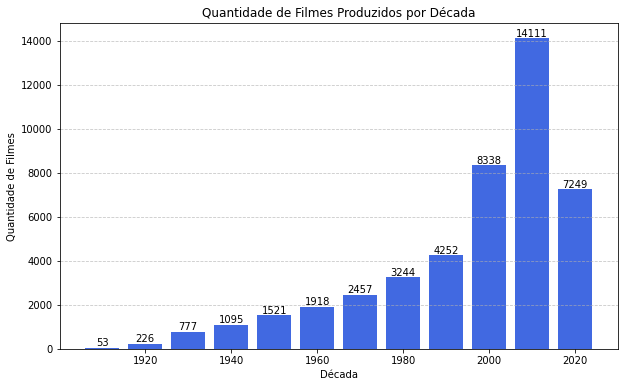

Década,Quantidade de Filmes
1910,53
1920,226
1930,777
1940,1095
1950,1521
1960,1918
1970,2457
1980,3244
1990,4252
2000,8338


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

#Quantos filmes foram produzidos por década?
query = """
SELECT 
    CAST(ff1.nu_ano_inicial / 10 AS INT) * 10 AS `Década`,
    COUNT(*) AS `Quantidade de Filmes`
FROM 
    curado.fato_filmes ff1
WHERE 
    ff1.vl_avaliacao_media IS NOT NULL
    AND ff1.nu_votos > 1000
GROUP BY 
    CAST(ff1.nu_ano_inicial / 10 AS INT) * 10
ORDER BY 1 ASC
"""

# Executando a query no Databricks
_sqldf = spark.sql(query)

# Convertendo para Pandas
df_pandas = _sqldf.toPandas()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df_pandas['Década'], df_pandas['Quantidade de Filmes'], color='royalblue', width=8)

# Adicionando os labels nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Personalização do gráfico
plt.xlabel('Década')
plt.ylabel('Quantidade de Filmes')
plt.title('Quantidade de Filmes Produzidos por Década')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir gráfico
plt.show()

# Exibir dados
display(df_pandas)


**Comentário:** o objetivo dessa pergunta é analisar o ritmo de produção dos filmes ao longo das décadas. Pode-se perceber que ao longo das décadas o número de filmes é cada vez maior. Como ainda estamos em 2025, a década de 2020 aparece menor, mas aparentemente o ritmo não diminuiu tanto, mesmo com a pandemia em 2020.

#Quais o ranking do número de filmes produzidos por país e por ano?

**Comentário:** Esta questão não pode ser respondida, pois o _dataset_ não possui a informação de que país produziu a obra.


#Qual a avaliação média dos filmes produzidos por gênero?

In [0]:
%sql
-- Qual a avaliação média dos filmes produzidos por gênero?
SELECT
  gen.tx_nome_genero,
  FORMAT_NUMBER(AVG(ff.vl_avaliacao_media),2) AS `Avaliação` 
FROM
  curado.fato_filmes ff
    INNER JOIN curado.generos_filmes go
      ON go.id_obra = ff.id_obra
        INNER JOIN curado.dim_generos gen
          ON go.id_genero = gen.id_genero
WHERE
  ff.vl_avaliacao_media IS NOT NULL
  AND ff.nu_votos > 50000
GROUP BY
  tx_nome_genero
ORDER BY 2 DESC


tx_nome_genero,Avaliação
Film-Noir,7.95
News,7.80
War,7.55
Western,7.53
Documentary,7.49
Biography,7.34
History,7.31
Animation,7.16
Drama,7.13
Musical,7.06


**Comentário:** o objetivo dessa pergunta é verificar quais gêneros têm a maior média de avaliação das suas obras mais populares.

#Quais os 3 gêneros mais bem avaliados por década?

In [0]:
%sql

--Quais os 3 gêneros mais bem avaliados por década?
WITH AvaliacoesPorDecada AS (
  SELECT 
    CAST(ff.nu_ano_inicial / 10 AS INT) * 10 AS `Década`,
    gen.tx_nome_genero AS `Gênero`,
    AVG(ff.vl_avaliacao_media) AS `Avaliação`,
    ROW_NUMBER() OVER (PARTITION BY CAST(ff.nu_ano_inicial / 10 AS INT) * 10 
                        ORDER BY AVG(ff.vl_avaliacao_media) DESC) AS rank
  FROM 
    curado.fato_filmes ff
    INNER JOIN curado.generos_filmes go ON go.id_obra = ff.id_obra
    INNER JOIN curado.dim_generos gen ON go.id_genero = gen.id_genero
  WHERE 
    ff.vl_avaliacao_media IS NOT NULL
    AND ff.nu_votos > 50000
  GROUP BY
    CAST(ff.nu_ano_inicial / 10 AS INT) * 10,
    gen.tx_nome_genero
)
SELECT 
  `Década`,
  `Gênero`,
  FORMAT_NUMBER(`Avaliação`, 2) AS `Avaliação`
FROM 
  AvaliacoesPorDecada
WHERE 
  rank <= 3
ORDER BY 
  `Década` ASC, 
  `Avaliação` DESC;

Década,Gênero,Avaliação
1920,Sci-Fi,8.30
1920,Family,8.20
1920,Comedy,8.15
1930,Romance,8.24
1930,War,8.15
1930,Comedy,8.12
1940,War,8.33
1940,Western,8.20
1940,Fantasy,8.15
1950,Action,8.60


**Comentário:** o objetivo dessa pergunta é verificar o ranking dos 3 gêneros preferidos por década e apresentar a média de suas avaliações. Essa análise demonstra as mudanças de preferência do público quando aos gêneros ao longo do tempo. O SQL desenvolvido utilizou _subquery_ com o WITH.

#Qual o tempo médio de duração dos filmes e como ele mudou ao longo dos anos?

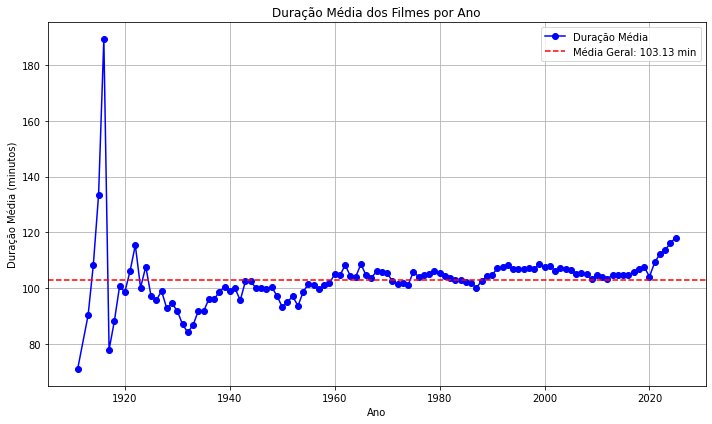

Ano,Duração Média,Quantidade de Filmes,Duração
1911,71.0,1,71.0
1913,90.33333333333333,3,90.33
1914,108.5,6,108.5
1915,133.5,2,133.5
1916,189.33333333333334,3,189.33
1917,78.0,1,78.0
1918,88.2,5,88.2
1919,100.71428571428571,14,100.71
1920,98.6923076923077,13,98.69
1921,106.18181818181819,11,106.18


Média Geral da Duração: 103.13 minutos


In [0]:
import matplotlib.pyplot as plt
import pandas as pd

#Qual o tempo médio de duração dos filmes e como ele mudou ao longo dos anos?
query = """
SELECT 
  nu_ano_inicial AS `Ano`,
  AVG(nu_duracao_min) AS `Duração Média`,
  COUNT(*) AS `Quantidade de Filmes`
FROM 
  curado.fato_filmes
WHERE
  1=1
  AND nu_votos > 1000
  AND nu_duracao_min BETWEEN 70 AND 300
GROUP BY 
  nu_ano_inicial
ORDER BY 
  nu_ano_inicial;
"""

# Executando a consulta no Databricks e convertendo para DataFrame Pandas
df_pandas = spark.sql(query).toPandas()

# Arredondando a coluna 'Duração' para 2 casas decimais
df_pandas['Duração'] = df_pandas['Duração Média'].round(2)

# Calculando a média geral da duração
media_geral = df_pandas['Duração'].mean()

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_pandas['Ano'], df_pandas['Duração Média'], marker='o', linestyle='-', color='b', label='Duração Média')

# Adicionando título e rótulos aos eixos
plt.title('Duração Média dos Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Duração Média (minutos)')

# Adicionando uma linha horizontal representando a média geral
plt.axhline(y=media_geral, color='r', linestyle='--', label=f'Média Geral: {media_geral:.2f} min')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Exibindo a tabela de dados
display(df_pandas)

# Exibindo a média geral com duas casas decimais
print(f'Média Geral da Duração: {media_geral:.2f} minutos')


**Comentário:** foi observado um aumento do tempo médio nos últimos anos. Os valores discrepantes nos primeiros anos sofrem efeito da pouca quantidade de filmes que eram produzidos nessa época.